In [1]:
import sys
sys.path.append('..')
import numpy as np
from throttle_function import throttle_tanh, throttle_tanh_deriv
from scipy.optimize._numdiff import approx_derivative
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

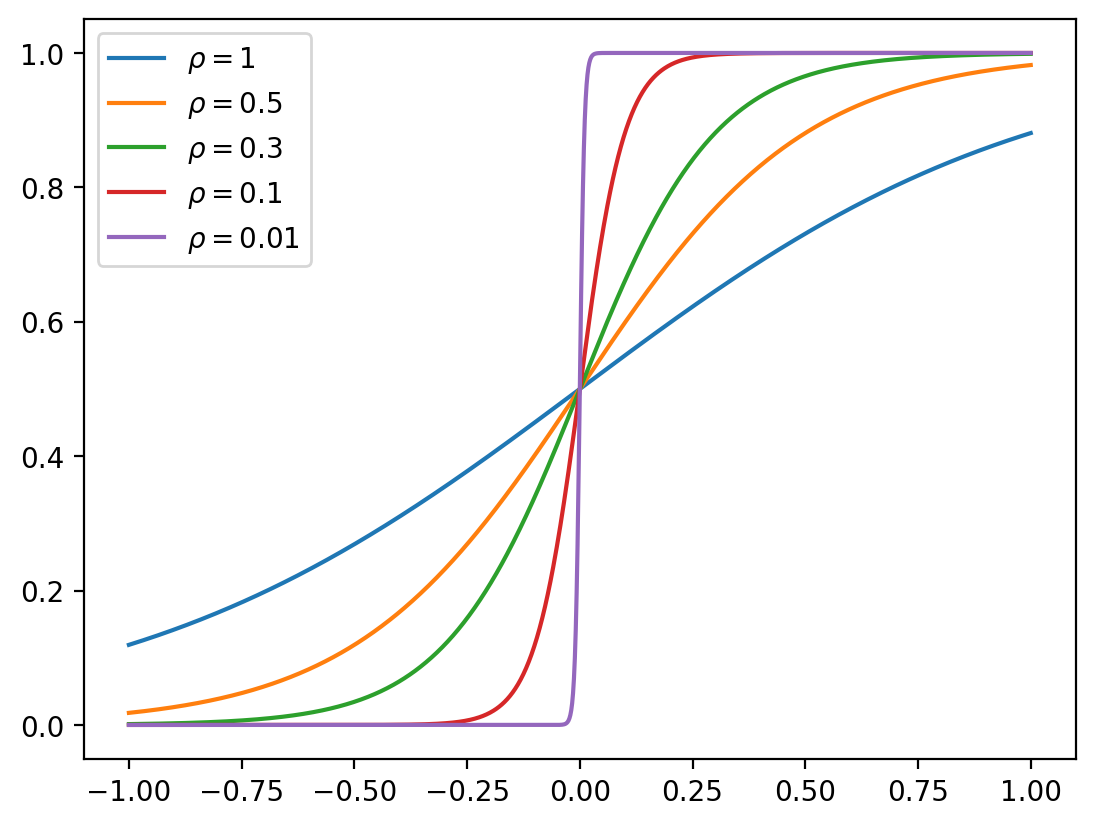

In [2]:
sf = np.linspace(-1, 1, 1000)
rhos = [1, 0.5, 0.3, 0.1, 0.01]

for rho in rhos:
    plt.plot(
        sf, throttle_tanh(sf, rho), '-',
        label=r'$\rho={}$'.format(rho)
    )
plt.legend()

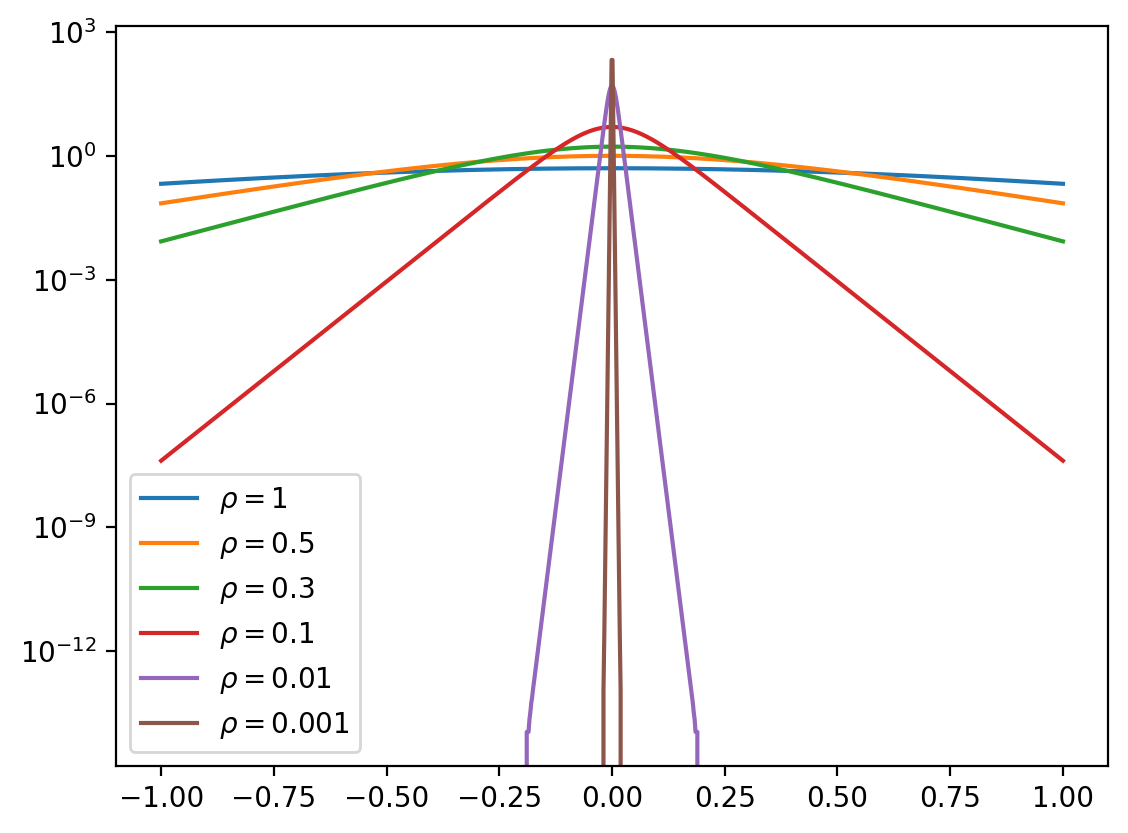

In [3]:
for rho in [*rhos, 1e-3]:
    plt.plot(
        sf, throttle_tanh_deriv(sf, rho), '-', 
        label=r'$\rho={}$'.format(rho)
    )
plt.legend()
plt.yscale('log')

In [4]:
for rho in rhos:
    dval_num = np.diag(approx_derivative(throttle_tanh, sf, args=(rho, )))
    dval_theo = throttle_tanh_deriv(sf, rho)
    abs_err = abs(dval_num - dval_theo)
    print(f"{max(abs_err): .2e}", f"{min(abs(dval_theo)): .2e}")

 2.15e-11  2.10e-01
 5.44e-11  7.07e-02
 2.31e-10  8.46e-03
 6.11e-09  4.12e-08
 5.87e-06  0.00e+00


In [5]:
%%timeit
throttle_tanh(sf, rho=0.001)

5.47 µs ± 7.24 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
%%timeit
throttle_tanh_deriv(sf, rho=0.001)

5.2 µs ± 8.97 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
